# Step 3 - Climate Analysis and Exploration

You are now ready to use Python and SQLAlchemy to do basic climate analysis and data exploration on your new weather station tables. All of the following analysis should be completed using SQLAlchemy ORM queries, Pandas, and Matplotlib.

Create a Jupyter Notebook file called climate_analysis.ipynb and use it to complete your climate analysis and data exporation.

Choose a start date and end date for your trip. Make sure that your vacation range is approximately 3-15 days total.

Use SQLAlchemy create_engine to connect to your sqlite database.

Use SQLAlchemy automap_base() to reflect your tables into classes and save a reference to those classes called Station and Measurement.


In [1]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite", echo = False )


# Reflection

In [3]:
Base = automap_base()
Base.prepare(engine, reflect= True)
Base.classes.keys()
# Station and Measurement

['Measurements', 'Station']

In [4]:
session = Session(engine)

In [5]:
Measurements = Base.classes.Measurements
    
Station = Base.classes.Station
    

In [6]:
session.query(Measurements.date).all()

[('2010-01-01'),
 ('2010-01-02'),
 ('2010-01-03'),
 ('2010-01-04'),
 ('2010-01-07'),
 ('2010-01-08'),
 ('2010-01-09'),
 ('2010-01-10'),
 ('2010-01-11'),
 ('2010-01-12'),
 ('2010-01-14'),
 ('2010-01-15'),
 ('2010-01-16'),
 ('2010-01-17'),
 ('2010-01-18'),
 ('2010-01-19'),
 ('2010-01-20'),
 ('2010-01-21'),
 ('2010-01-22'),
 ('2010-01-23'),
 ('2010-01-24'),
 ('2010-01-25'),
 ('2010-01-26'),
 ('2010-01-27'),
 ('2010-01-28'),
 ('2010-01-31'),
 ('2010-02-01'),
 ('2010-02-04'),
 ('2010-02-05'),
 ('2010-02-06'),
 ('2010-02-07'),
 ('2010-02-08'),
 ('2010-02-09'),
 ('2010-02-11'),
 ('2010-02-12'),
 ('2010-02-13'),
 ('2010-02-14'),
 ('2010-02-15'),
 ('2010-02-16'),
 ('2010-02-17'),
 ('2010-02-20'),
 ('2010-02-21'),
 ('2010-02-22'),
 ('2010-02-23'),
 ('2010-02-24'),
 ('2010-02-25'),
 ('2010-02-26'),
 ('2010-02-28'),
 ('2010-03-01'),
 ('2010-03-02'),
 ('2010-03-03'),
 ('2010-03-04'),
 ('2010-03-05'),
 ('2010-03-06'),
 ('2010-03-07'),
 ('2010-03-08'),
 ('2010-03-09'),
 ('2010-03-12'),
 ('2010-03-13'

In [7]:
session.query(Station.station).all()

[('USC00519397'),
 ('USC00513117'),
 ('USC00514830'),
 ('USC00517948'),
 ('USC00518838'),
 ('USC00519523'),
 ('USC00519281'),
 ('USC00511918'),
 ('USC00516128'),
 ('USC00519397'),
 ('USC00513117'),
 ('USC00514830'),
 ('USC00517948'),
 ('USC00518838'),
 ('USC00519523'),
 ('USC00519281'),
 ('USC00511918'),
 ('USC00516128')]

## Precipitation Analysis:

Design a query to retrieve the last 12 months of precipitation data.

Select only the date and prcp values.

Load the query results into a Pandas DataFrame and set the index to the date column.

Plot the results using the DataFrame plot method.



In [8]:
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib
matplotlib.use('nbagg')
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

date1 = dt.datetime(2016, 1,1)
date2 = dt.datetime(2016,12,31)

In [9]:
result = session.query(Measurements.date, Measurements.prcp).\
           filter(Measurements.date >= date1).\
           filter(Measurements.date <= date2).all()

In [10]:
df = pd.DataFrame(result, columns = ["date", "prcp"])
df['date'] = pd.to_datetime(df['date'])

df = df.set_index("date")
df.head()

,prcp
date,
2016-01-02,0.0
2016-01-03,0.0
2016-01-04,0.0
2016-01-05,0.0
2016-01-06,0.0


<IPython.core.display.Javascript object>


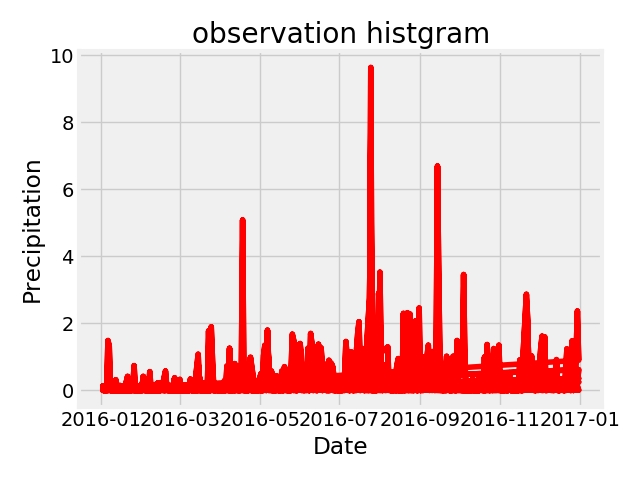

In [11]:
fig, ax = plt.subplots()
ax.plot(df.index,df['prcp'] , color="red")
ax.set_xlabel("Date")
ax.set_ylabel("Precipitation")
ax.set_title("Precipitation")
fig.tight_layout()
plt.show()

## Station Analysis

Design a query to calculate the total number of stations.

Design a query to find the most active stations.

List the stations and observation counts in descending order
Which station has the highest number of observations?
Design a query to retrieve the last 12 months of temperature observation data (tobs).

Filter by the station with the highest number of observations.
Plot the results as a histogram with bins=12.


In [12]:
session.query(func.count(Station.station)).all()

[(18)]

In [13]:
dt.date(2017,8,23) - dt.timedelta(days=365)

datetime.date(2016, 8, 23)

In [14]:
sel = [Station.station, func.count(Measurements.tobs)]
session.query(*sel).filter(Station.station == Measurements.station ).\
                group_by(Station.station).\
                order_by(func.count(Measurements.tobs).desc()).limit(1).all()               

[('USC00519281', 11088)]

In [15]:
sel = [Station.station, func.sum(Measurements.tobs)]
date1= dt.datetime(2017,8,23)
date2 = date1 - dt.timedelta(days=365)
session.query(*sel).filter(Station.station == Measurements.station ).\
                  filter(Measurements.date <= date1).\
                 filter(Measurements.date >= date2).\
                group_by(Station.station).\
                order_by(func.sum(Measurements.tobs).desc()).all()

[('USC00519397', 107660.0),
 ('USC00519281', 102628.0),
 ('USC00513117', 100232.0),
 ('USC00519523', 96404.0),
 ('USC00516128', 94184.0),
 ('USC00514830', 81504.0),
 ('USC00517948', 17732.0)]

In [36]:
result1= session.query(*sel).filter(Station.station == Measurements.station ).\
                group_by(Station.station).\
                order_by(func.count(Measurements.tobs).desc()).all()               

In [47]:
df1 = pd.DataFrame(result1, columns = ['station', 'number of obvervation'])
df1 = df1.set_index('station')
df1

,number of obvervation
station,
USC00519281,794608.0
USC00513117,783760.0
USC00519397,800820.0
USC00519523,766792.0
USC00516128,704116.0
USC00514830,579652.0
USC00511918,552764.0
USC00517948,203772.0
USC00518838,99420.0


<IPython.core.display.Javascript object>


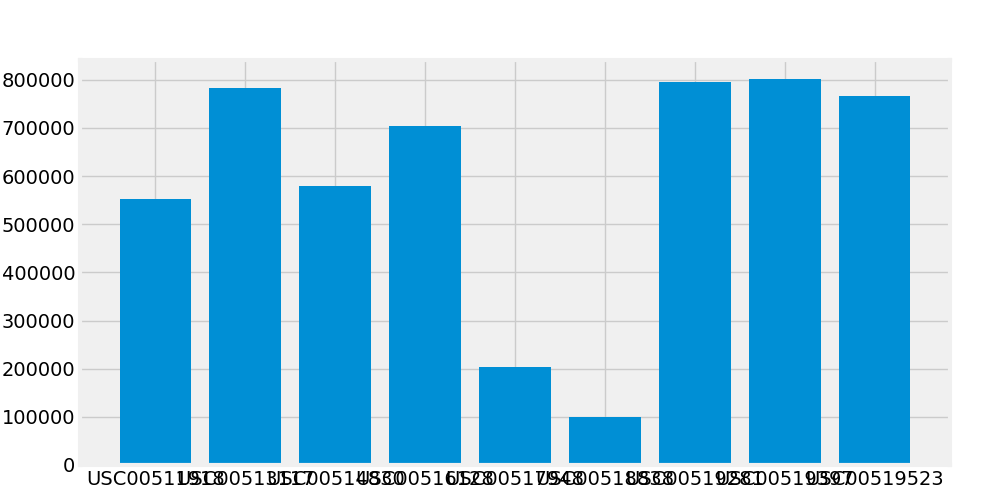

In [52]:
n_bins = 8
x = df1.index
y = df1['number of obvervation']
fig, axes = plt.subplots(figsize=(10,5))

axes.bar(x,y )
ax.set_title("observation histgram")
fig.show()

# Temperature Analysis

Write a function called calc_temps that will accept a start date and end date in the format %Y-%m-%d and return the minimum, average, and maximum temperatures for that range of dates.

Use the calc_temps function to calculate the min, avg, and max temperatures for your trip using the matching dates from the previous year (i.e. use "2017-01-01" if your trip start date was "2018-01-01")

Plot the min, avg, and max temperature from your previous query as a bar chart.

Use the average temperature as the bar height.
Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr).


In [19]:
def stripdate(date):
    day = pd.to_numeric(pd.to_datetime(date).strftime("%d"))
    month= pd.to_numeric(pd.to_datetime(date).strftime("%m"))
    year = pd.to_numeric(pd.to_datetime(date).strftime("%Y"))
    
    Year = pd.to_numeric((dt.datetime(year, month, day) - dt.timedelta(days=365)).strftime("%Y"))
    Month= pd.to_numeric((dt.datetime(year, month, day) - dt.timedelta(days=365)).strftime("%m"))
    Day= pd.to_numeric((dt.datetime(year, month, day) - dt.timedelta(days=365)).strftime("%d"))
    
    return dt.datetime(Year, Month, Day).strftime("%Y-%m-%d")

In [20]:
start_date = "2016-03-24"
end_date = "2016-04-09"

In [21]:
def calc_temps(start_date,  end_date):
    
    Pre_start_date = stripdate(start_date)
    Pre_end_date = stripdate(end_date)
    
    result = session.query(func.avg(Measurements.prcp), func.min(Measurements.prcp), func.max(Measurements.prcp) ).\
           filter(Measurements.date >= Pre_start_date).\
           filter(Measurements.date <= Pre_end_date).all()
            
    return pd.DataFrame(result, columns= ['Avg', "MIN", "Max"])
        
    
    
    
    

In [22]:
ptps = calc_temps(start_date,  end_date)

<IPython.core.display.Javascript object>


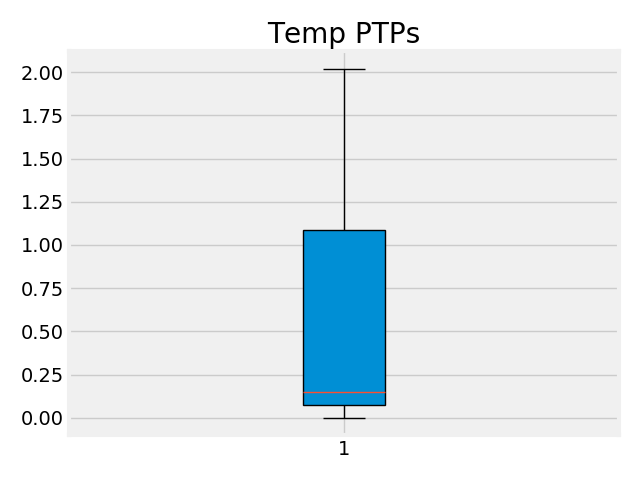

In [23]:
import numpy as np

fig, ax = plt.subplots()

x = range(len(ptps))
ax.boxplot(ptps, patch_artist=True)
ax.set_title('Temp PTPs')
fig.tight_layout()
fig.show()

# Optional Recommended Analysis

The following are optional challenge queries. These are highly recommended to attempt, but not required for the homework.

Calcualte the rainfall per weather station using the previous year's matching dates.



In [24]:
start_date = "2016-03-24"
end_date = "2016-04-09"

Pre_start_date = stripdate(start_date)
Pre_end_date = stripdate(end_date)

In [25]:
#the rainfall per weather station using the previous year's matching dates.
session.query(Measurements.station, func.avg(Measurements.prcp) ).\
        filter(Measurements.date >= Pre_start_date).\
           filter(Measurements.date <= Pre_end_date).\
        group_by(Measurements.station).all()
            

[('USC00511918', 0.0),
 ('USC00513117', 0.09470588235294118),
 ('USC00514830', 0.07750000000000001),
 ('USC00516128', 0.4961538461538462),
 ('USC00517948', 0.01),
 ('USC00519281', 0.15470588235294117),
 ('USC00519397', 0.042352941176470586),
 ('USC00519523', 0.15866666666666665)]

In [26]:
## daily normal 
start_date = "2016-03-24"
end_date = "2016-04-09"
calc_temps(start_date,  end_date).mean(axis = 1)

0    0.722997
dtype: float64

Create a function called daily_normals that will calculate the daily normals for a specific date. This date string will be in the format %m-%d. Be sure to use all historic tobs that match that date string.

Create a list of dates for your trip in the format %m-%d. Use the daily_normals function to calculate the normals for each date string and append the results to a list.


Load the list of daily normals into a Pandas DataFrame and set the index equal to the date.

Use Pandas to plot an area plot (stacked=False) for the daily normals.


In [27]:
#  daily_normals function: 


def  daily_normals(input_date):
    
    results = session.query(Measurements.date).all()
    all_date = list(np.ravel(results))  

    result = session.query(Measurements.date).filter(Measurements.date.contains(input_date)).group_by(Measurements.date).all()
    specified_dates = list(np.ravel(result))

    result_list = []

    for i in range(len(specified_dates)):
        if specified_dates[i] in all_date:
            result = session.query(func.avg(Measurements.prcp), func.min(Measurements.prcp), func.max(Measurements.prcp)).\
            filter(Measurements.date == specified_dates[i]).all()
            precp = list(np.ravel(result))  
      
        result_list.append(precp)
    
    rainfall_norm = {}
    
    for j in range(len(result_list)):
        rainfall_norm[specified_dates[j]]  =  np.mean(result_list[j])
    return pd.DataFrame.from_dict(rainfall_norm,orient='index')

In [28]:
input_date = '04-09'

df = daily_normals(input_date)

<IPython.core.display.Javascript object>


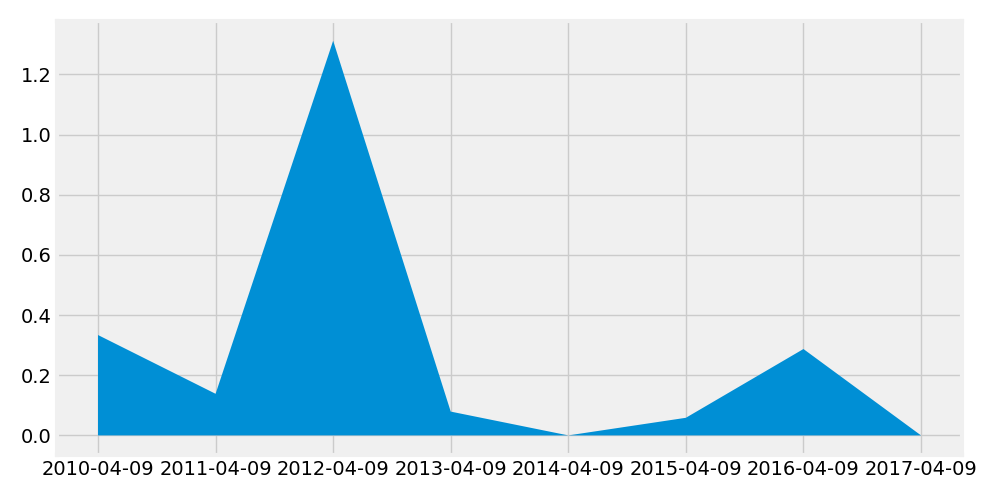

In [29]:

import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (10,5))

x = range(len(ptps))
ax.stackplot(df.index, df[0])

fig.tight_layout()
fig.show()
